In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
image = cv2.imread('bycicle.png',0) 
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)
plt.imshow(noise_img)


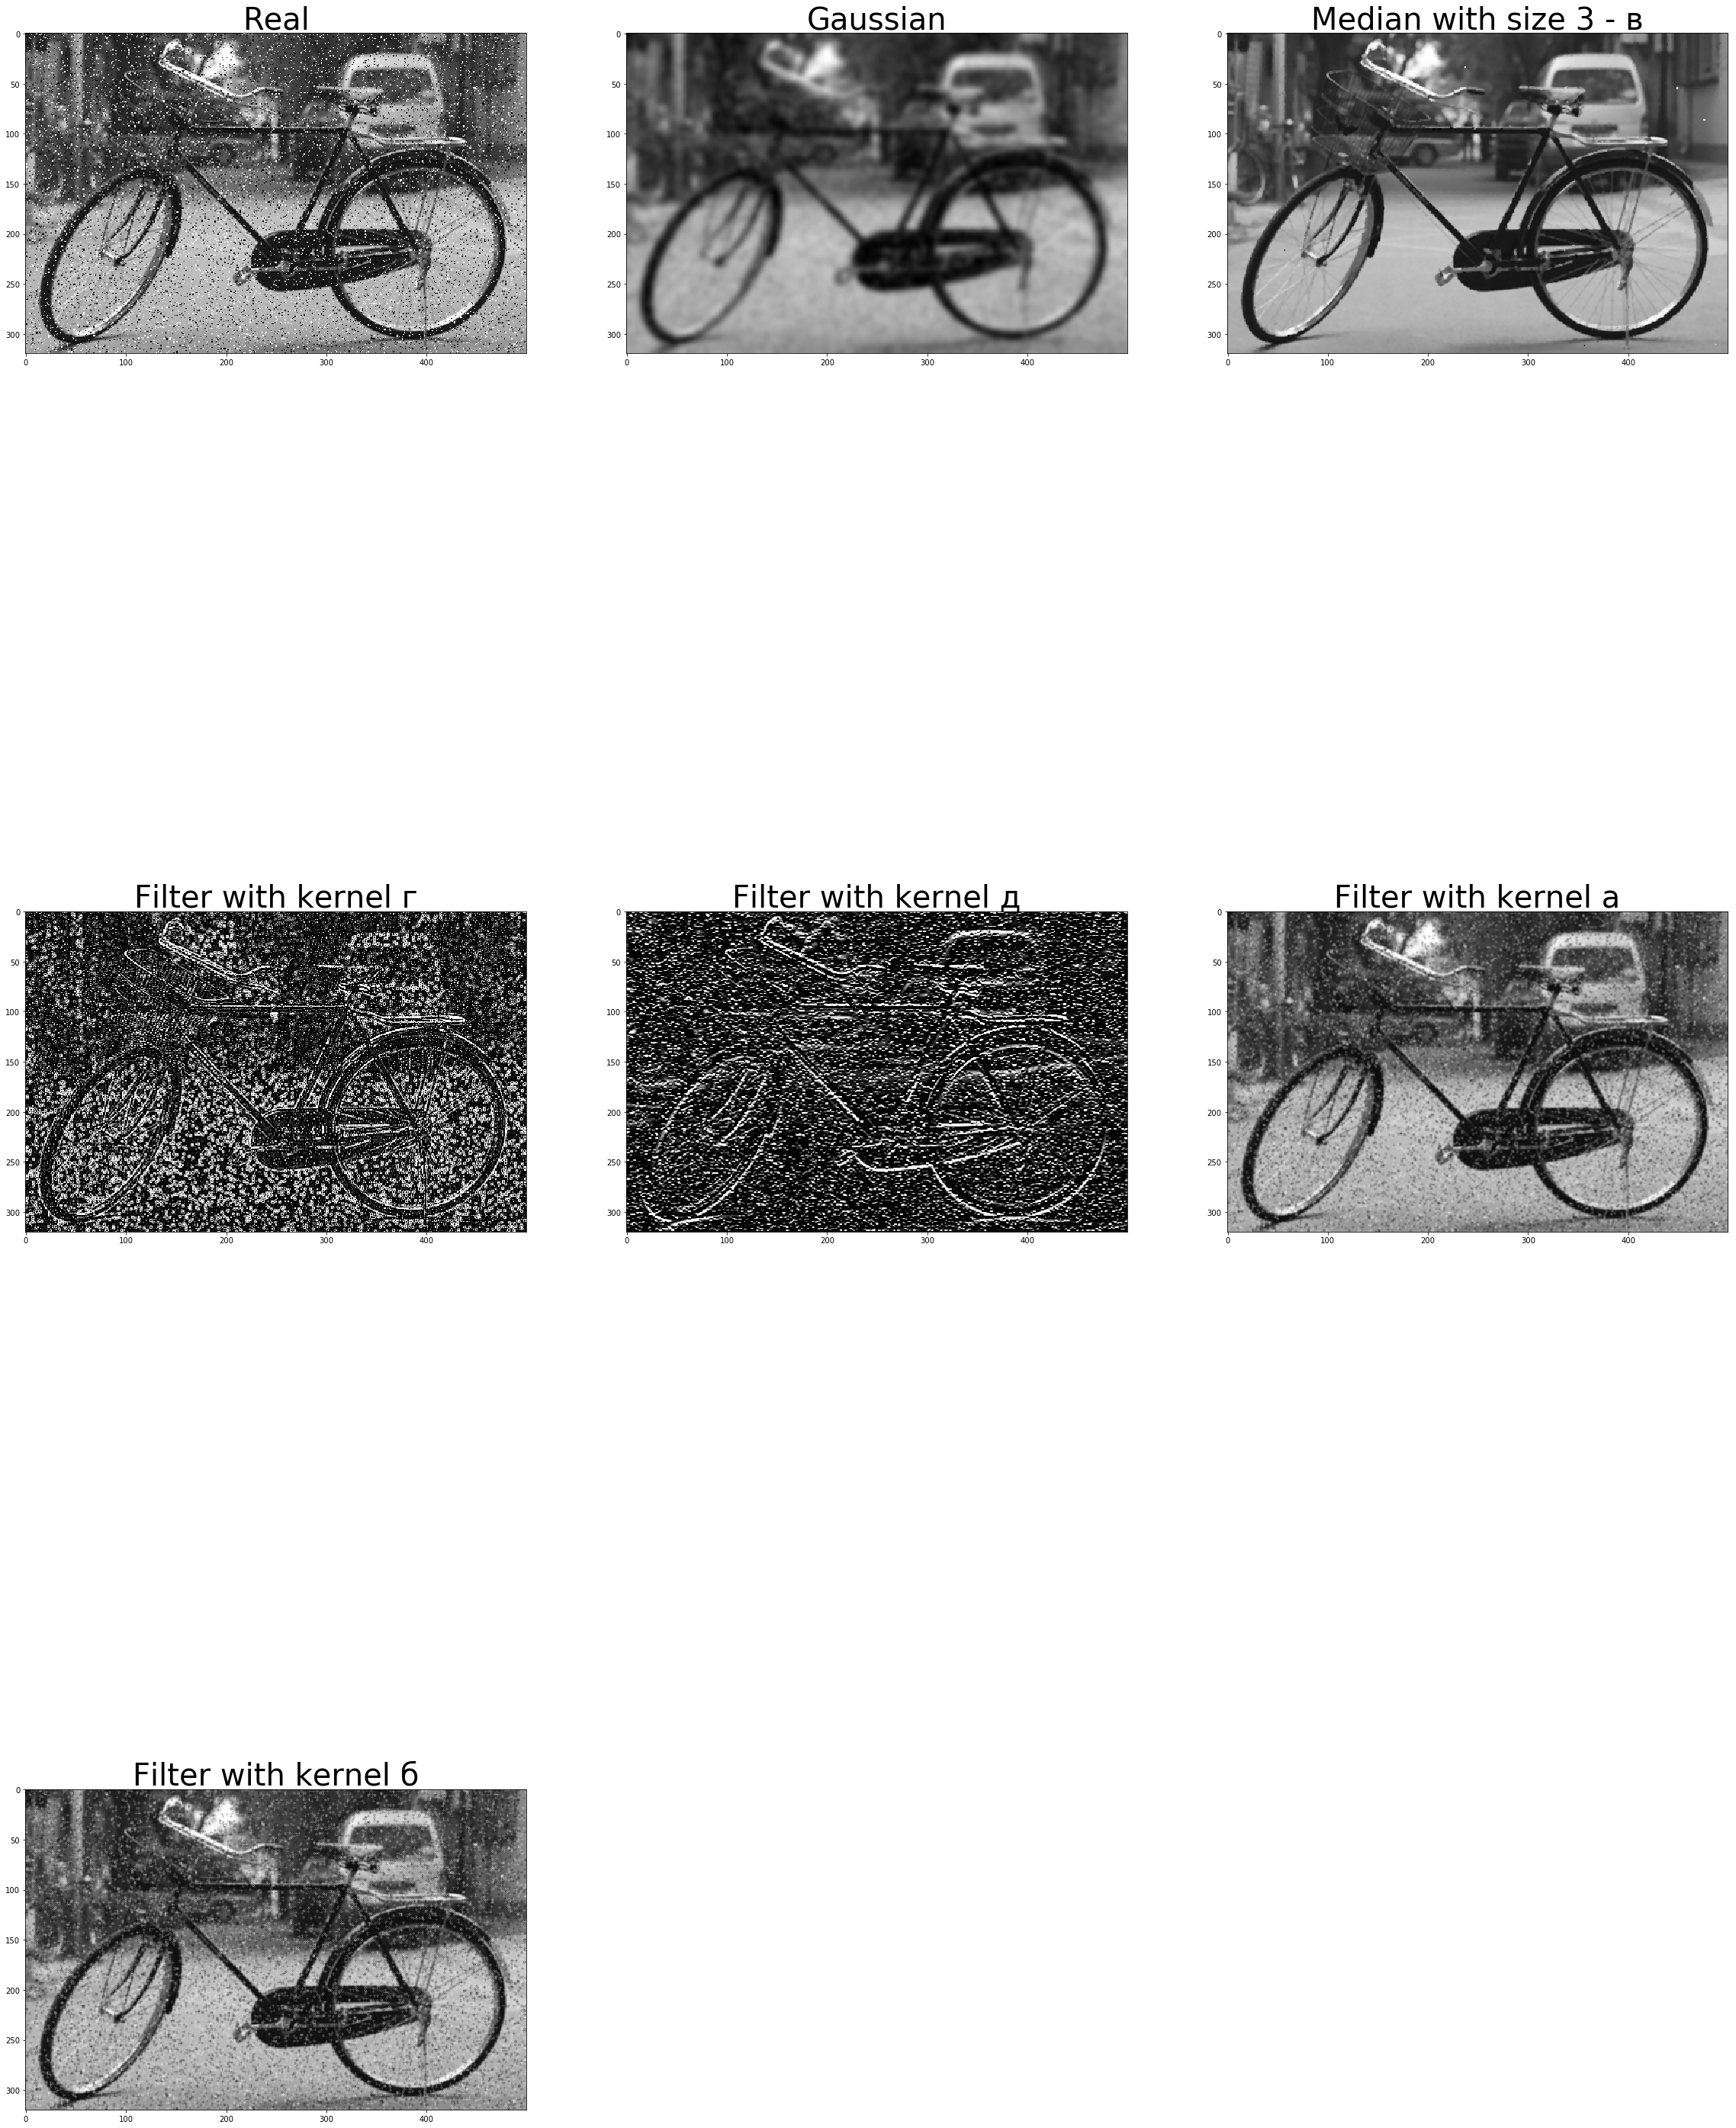

In [31]:
from PIL import Image 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
im = cv2.imread('sp_noise.jpg',0)
fig = plt.figure(figsize= (40,60))

from scipy.ndimage.filters import gaussian_filter
gaus = gaussian_filter(im, sigma =3)

from scipy.ndimage.filters import median_filter
med =median_filter(im, size =3)

kernel4 = np.array([[-1, -2, -1],[-2, 12, -2],[-1, -2, -1]])
im4 = cv2.filter2D(im, -1, kernel4)

kernel5 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
im5 = cv2.filter2D(im, -1, kernel5)

kernel1 = np.array([[1/16, 1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]])
im1 = cv2.filter2D(im, -1, kernel1)

kernel2 = np.array([[0, 1/5, 0],[1/5, 1/5, 1/5],[0, 1/5, 0]])
im2 = cv2.filter2D(im, -1, kernel2)

plt.subplot(331)
plt.imshow(im,cmap='gray')
plt.title ('Real', fontsize = 40)
plt.subplot(332)
plt.imshow(gaus,cmap='gray')
plt.title ('Gaussian', fontsize = 40)
plt.subplot(333)
plt.imshow(med,cmap='gray')
plt.title ('Median with size 3 - в', fontsize = 40)
plt.subplot(334)
plt.imshow(im4,cmap='gray')
plt.title ('Filter with kernel г', fontsize = 40)
plt.subplot(335)
plt.imshow(im5,cmap='gray' )
plt.title ('Filter with kernel д', fontsize = 40)
plt.subplot(336)
plt.imshow(im1,cmap='gray' )
plt.title ('Filter with kernel a', fontsize = 40)
plt.subplot(337)
plt.imshow(im2,cmap='gray' )
plt.title ('Filter with kernel б', fontsize = 40)
plt.show()